<a href="https://colab.research.google.com/github/ayushanand18/pyobis/blob/depth-tsa/notebook/depth_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Species Depth - A time series analysis
Climate Change and global warming has forced animals and plants globally to shift their habitats. Marine organisms are one of the most hit due to oceans becoming warmer. Increased sea temperatures have forced changes in depth. At a glance change in depth with time can be categorized into:
+ Conservatism i.e. no change in depth.
+ Shift, where the minimal and maximal depth change with the same amount.
+ Compression, where the maximal depth remains nearly constant but minimal depth shrinks significantly.
+ Expansion, where the maximal depth shifts significantly downwards while minimal depth remains nearly constant.

The [Ocean Biodiversity Information System (OBIS)](https://obis.org/) is a global open-access data and information clearing-house on marine biodiversity for science, conservation and sustainable development. OBIS aims to provide world’s largest scientific knowledge base on the diversity, distribution and abundance of all marine organisms in an integrated and standardized format.) is a global open-access data and information clearing-house on marine biodiversity for science, conservation and sustainable development. OBIS aims to provide world’s largest scientific knowledge base on the diversity, distribution and abundance of all marine organisms in an integrated and standardized format.



In this notebook we will utilise `pyobis` to fetch OBIS occurrence records. Let us install `pyobis` first.

# Installing pyobis

In [1]:
try:
  import pyobis
except:
  %pip install git+https://github.com/iobis/pyobis.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/iobis/pyobis.git to /tmp/pip-req-build-59t4dlv0
  Running command git clone -q https://github.com/iobis/pyobis.git /tmp/pip-req-build-59t4dlv0
  Created wheel for pyobis: filename=pyobis-1.0.0-py3-none-any.whl size=16309 sha256=5cc08f1e93553c3875d15b064ed412cd957a5979e81360c668f6267f90d2edb5
  Stored in directory: /tmp/pip-ephem-wheel-cache-jv1chmyz/wheels/15/4e/c5/1970d4803b41b99e306dd86795433089732f219ccecf8fc00c
Successfully built pyobis


Importing other modules

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pyobis import occurrences as occ
%matplotlib inline
import numpy as np

# Grabbing Data

Let us get started by grabbing some data for *Mola mola* (Ocean Sunfish). We will then draw a depth time-series analysis plot.

In [3]:
# since we want to do analysis with depth we want only those records which have depth records. for this we set startdepth to zero.
res = occ.search(taxonid=127405, startdepth=-1.0)["results"]
df = pd.DataFrame(res)
df

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 280/280
Fetched 280 records.


,rightsHolder,infraphylum,date_year,institutionID,scientificNameID,year,scientificName,dropped,gigaclassid,fieldNumber,...,georeferenceVerificationStatus,accessRights,organismQuantity,organismQuantityType,county,islandGroup,preparations,typeStatus,associatedMedia,georeferenceSources
0,The Huntsman Marine Science Centre and Fisheri...,Gnathostomata,2013.0,ARC,urn:lsid:marinespecies.org:taxname:127405,2013,Mola mola,False,10194,Z29760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Gnathostomata,2013.0,NaN,urn:lsid:marinespecies.org:taxname:127405,2013,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Gnathostomata,2011.0,8c116cac-9394-4c4e-be14-06184bdc62bd,urn:lsid:marinespecies.org:taxname:127405,NaN,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"'Her Majesty the Queen in right of Canada, as ...",Gnathostomata,2007.0,NaN,urn:lsid:marinespecies.org:taxname:127405,01,Mola mola,False,10194,RAMM-2007-ew04-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Gnathostomata,1995.0,NaN,urn:lsid:marinespecies.org:taxname:127405,1995,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Gnathostomata,2011.0,NaN,urn:lsid:marinespecies.org:taxname:127405,2011,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,NaN,Gnathostomata,2012.0,8c116cac-9394-4c4e-be14-06184bdc62bd,urn:lsid:marinespecies.org:taxname:127405,NaN,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,NaN,Gnathostomata,2014.0,8c116cac-9394-4c4e-be14-06184bdc62bd,urn:lsid:marinespecies.org:taxname:127405,NaN,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,NaN,Gnathostomata,2004.0,NaN,urn:lsid:marinespecies.org:taxname:127405,NaN,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df[["depth","waterBody", "vernacularName","organismQuantity","marine","continent", "year"]]

,depth,waterBody,vernacularName,organismQuantity,marine,continent,year
0,0.00,NaN,NaN,NaN,True,NaN,2013
1,10.05,NaN,NaN,NaN,True,NaN,2013
2,0.00,Cape Cod Bay,ocean sunfish,NaN,True,North America,NaN
3,0.00,NaN,NaN,NaN,True,NaN,01
4,40.90,NaN,NaN,NaN,True,NaN,1995
...,...,...,...,...,...,...,...
275,15.00,NaN,NaN,NaN,True,Bali Sea,2011
276,0.00,Cape Cod Bay,ocean sunfish,NaN,True,North America,NaN
277,0.00,Atlantic Ocean,ocean sunfish,NaN,True,North America,NaN
278,400.00,NaN,NaN,NaN,True,NaN,NaN


Let's plot a line plot with depthinmeters v/s year. For this let us collect our data first. We want records only where both `depth` and `year` fields are non-empty.

In [20]:
timeDF = df[df["year"].notnull() & df["depth"].notnull()][["depth","year"]]

Let us now look at the `year` values and clean the data.

In [21]:
timeDF = timeDF[timeDF["year"].notna()]

In [22]:
timeDF.year.unique()

array(['2013', '01', '1995', '2010', '2018', '2015', '2003', '2019',
       '2007', '2002', '1982', '2004', '1983', '2005', '2012', '31',
       '2017', '21', '22', '2009', '2008', '1992', '1977', '1986', '05',
       '1990', '1997', '1993', '2014', '14', '2011', '2006', '18', '15',
       '02', '1998', '1981', '1965', '1999', '1996', '2016', '1991',
       '1964', '03', '26', '1975', '06', '1987', '1994', '1972', '2001'],
      dtype=object)

We can see some year values are just two digits, we cannot definitely say which century it was 19th, 20th or 21st - who knows? So let us do a workaround to get the real values. We will find the corresponding `eventDate` from the original DataFrame and pick the year part from it.

In [26]:
timeDF["year"] = timeDF["year"].astype(int) # first changing to int data type to ease comparison
newYears = df.loc[timeDF[timeDF["year"].isin([1,5,6,31,21,22,14,18,15,2,3,26])].index,"eventDate"].str[:4] # getting only specific values
timeDF.loc[newYears.index,"year"] = newYears.astype(int) # replacing with the new year value
timeDF.loc[newYears.index,"year"] # let us see what we did

227    1995
Name: year, dtype: int64

Whoa, great! Now that we have updated the year values let us plot the time series analysis plot.

In [27]:
sns.set(rc = {'figure.figsize':(15,10)})

In [28]:
timeDF.min()

depth       0.0
year     1964.0
dtype: float64

But before we move onto plotting a time-series plot for species depth let us first visualize how depth records are distributed over the years.

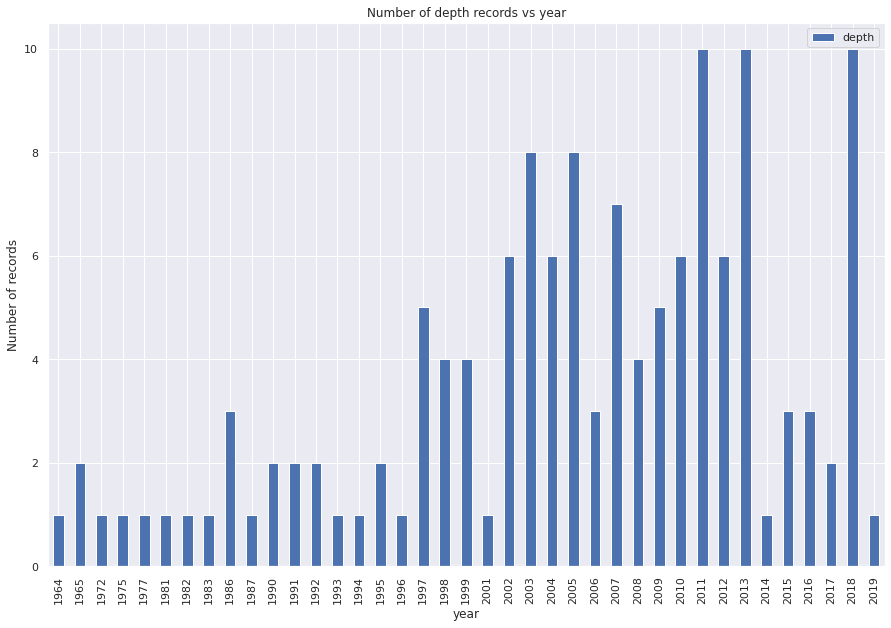

In [40]:
timeDF.groupby("year").count().plot.bar()
plt.ylabel("Number of records")
plt.title("Number of depth records vs year");

Its evident that there is a huge variation in the number of records over these years. 2011, 2013 and 2018 have got high amount of records but the years in between them have much less records. This high variation might add up unnecessary noise to our analysis and we might not be able to strongly conclude a trend.

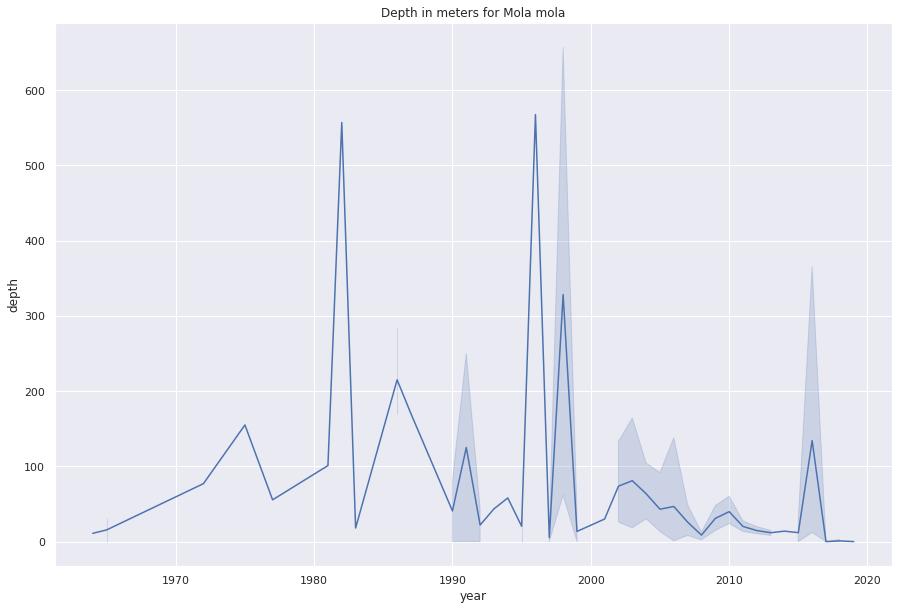

In [29]:
sns.set_style("darkgrid")
p = sns.lineplot(x = timeDF["year"],y = timeDF["depth"])
p.set_title("Depth in meters for Mola mola");

Let us also add a rolling average to this plot.

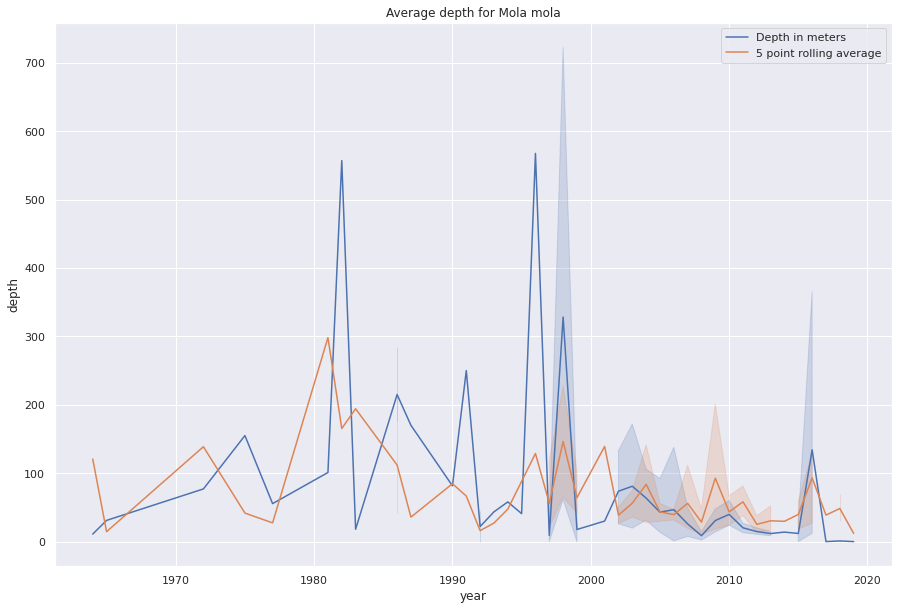

In [ ]:
sns.set_style("darkgrid")
p = sns.lineplot(x = timeDF[timeDF["year"]>1900]["year"],y = timeDF[timeDF["year"]>1900]["depth"], label="Depth in meters")
sns.lineplot(x = timeDF[timeDF["year"]>1900]["year"], y = timeDF.depth.rolling(5).mean(), label="5 point rolling average")
p.legend()
p.set_title("Average depth for Mola mola");

We can clearly see that as time has passed, the average depth in meters has decreased significantly. This is also alarming because there is a drastic change in average depth over the years. However, since many records have missing `depth` parameter out of 20,972 occurrence records for *Mola mola* only 274 records had a `depth` entry. So this might not be the complete picture.

### Other species: How are they doing?

We saw how the change in average depth has been recorded for *Mola mola*, let us know study how other marine species are doing. So we pick up some species each from:
+ dolphins (and porpoises)
+ turtles
+ tuna
+ whale

Let us first define the species, and grab the data. Fasten your seatbelts, we we'll be going on long drive!

In [ ]:
species = [
           'Tursiops truncatus', # common bottlenose dolphin
           'Orcinus orca', # killer whale - orca
           'Tursiops aduncus', # Indo-Pacific bottlenose dolphin
           'Inia geoffrensis', # amazon river dolphin
           'Cheloniidae', # sea turtles
           'Dermochelyidae families', # sea turtles
           'Eretmochelys imbricata', # hawksbill sea turtle
           'Dermochelys coriacea', # leatherback sea turtle
           'Thunnus', # tuna
           'Katsuwonus', # tuna
           'Rhincodon typus', # whale shark
           'Lepomis gibbosus', # pumpkinseed (a sunfish)
]

We will now check whether they have any records or not.

In [ ]:
hasRecords=[]
for j in species:
  data = occ.search(scientificname=j,size=1)
  if(data["total"]>0):
    hasRecords.append(j)
    print("{} Records found for {}".format(data["total"],j))

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 1/1
Fetched 1 records.
78299 Records found for Tursiops truncatus

Fetched 1 records.
11540 Records found for Orcinus orca

Fetched 1 records.
3208 Records found for Tursiops aduncus

Fetched 1 records.
1 Records found for Inia geoffrensis

Fetched 1 records.
336456 Records found for Cheloniidae

Fetched 1 records.

Fetched 1 records.
12342 Records found for Eretmochelys imbricata

Fetched 1 records.
21324 Records found for Dermochelys coriacea

Fetched 1 records.
516713 Records found for Thunnus

Fetched 1 records.
103442 Records found for Katsuwonus

Fetched 1 records.
10353 Records found for Rhincodon typus

Fetched 1 records.
9050 Records found for Lepomis gibbosus


That's really a huge amount of records, but *Inia geoffrensis* has got only 1 record, so we'll drop it.

In [ ]:
hasRecords.remove('Inia geoffrensis')

In [ ]:
hasRecords

['Tursiops truncatus',
 'Orcinus orca',
 'Tursiops aduncus',
 'Cheloniidae',
 'Eretmochelys imbricata',
 'Dermochelys coriacea',
 'Thunnus',
 'Katsuwonus',
 'Rhincodon typus',
 'Lepomis gibbosus']

Now let us grab depth data for these species.

In [ ]:
res = occ.search(scientificname=hasRecords, startdepth=-1.0)["results"]
data = pd.DataFrame(res)
data


Fetched 395570 records.


,infraphylum,country,megaclass,date_year,scientificNameID,scientificName,superfamilyid,dropped,aphiaID,decimalLatitude,...,organismScope,associatedSequences,acceptedNameUsage,higherClassification,locationAccordingTo,nomenclaturalCode,identificationVerificationStatus,verbatimSRS,georeferenceVerificationStatus,organismRemarks
0,Gnathostomata,Australia,Tetrapoda,2019.0,urn:lsid:marinespecies.org:taxname:137206,Chelonia mydas,987094.0,False,137206,-21.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,NaN,NaN,1998.0,urn:lsid:marinespecies.org:taxname:127027,Thunnus albacares,NaN,False,127027,26.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gnathostomata,Australia,Tetrapoda,2013.0,urn:lsid:marinespecies.org:taxname:137206,Chelonia mydas,987094.0,False,137206,-23.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:127028,Thunnus obesus,NaN,False,127028,26.964172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gnathostomata,NaN,NaN,2000.0,urn:lsid:marinespecies.org:taxname:127027,Thunnus albacares,NaN,False,127027,33.330000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395565,Gnathostomata,Australia,Tetrapoda,2021.0,urn:lsid:marinespecies.org:taxname:137206,Chelonia mydas,987094.0,False,137206,-22.346000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395566,Gnathostomata,NaN,NaN,1993.0,urn:lsid:marinespecies.org:taxname:127026,Thunnus alalunga,NaN,False,127026,26.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395567,Gnathostomata,NaN,NaN,1997.0,urn:lsid:marinespecies.org:taxname:127027,Thunnus albacares,NaN,False,127027,29.030000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395568,Gnathostomata,Australia,Tetrapoda,2021.0,urn:lsid:marinespecies.org:taxname:137206,Chelonia mydas,987094.0,False,137206,-20.474000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


That's a huge data! 395,570 rows of data. Let's plot a combined plot of all the species. But first let us see which species are there.

In [ ]:
data.scientificName.unique()

array(['Chelonia mydas', 'Thunnus albacares', 'Thunnus obesus',
       'Eretmochelys imbricata', 'Thunnus alalunga', 'Thunnus atlanticus',
       'Lepidochelys olivacea', 'Thunnus thynnus', 'Caretta caretta',
       'Katsuwonus pelamis', 'Lepomis gibbosus', 'Dermochelys coriacea',
       'Thunnus maccoyii', 'Orcinus orca', 'Lepidochelys kempii',
       'Rhincodon typus', 'Tursiops truncatus', 'Thunnus',
       'Natator depressa', 'Tursiops truncatus ponticus',
       'Tursiops aduncus', 'Thunnus tonggol', 'Cheloniidae', 'Caretta',
       'Eretmochelys', 'Thunnus maculata', 'Chelonia',
       'Thunnus orientalis', 'Eretmochelys imbricata bissa'], dtype=object)

In [ ]:
print("There are {} species in the data.".format(len(data.scientificName.unique())))

There are 29 species in the data.


Now let us get not null entries for years.

In [ ]:
dataDeriv = data[data["year"].notnull()]
allY=np.linspace(dataDeriv.year.unique().astype(int).min(), dataDeriv.year.unique().astype(int).max(),7)
allY = allY.astype(int)

In [ ]:
allY

array([1886, 1908, 1930, 1953, 1975, 1997, 2020])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


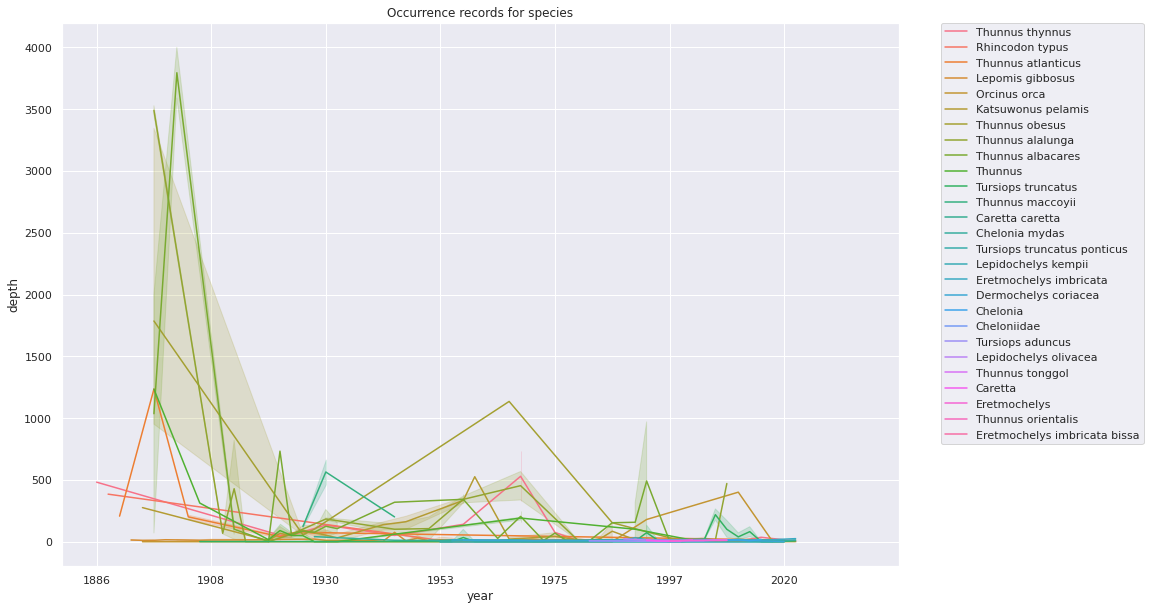

In [ ]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,10)})
dataDeriv.sort_values(by="year", inplace=True) # we are sorting our data first
p = sns.lineplot(data = dataDeriv, x = "year", y = "depth", hue="scientificName") # we will plot different lines for different species
plt.xticks(range(0,71,10), allY) # setting a readable xaxis label
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # to avoid congestion we are shifting legend outside the graph
p.set_title("Occurrence records for species");

We can see huge variations for *Thunus albacares*

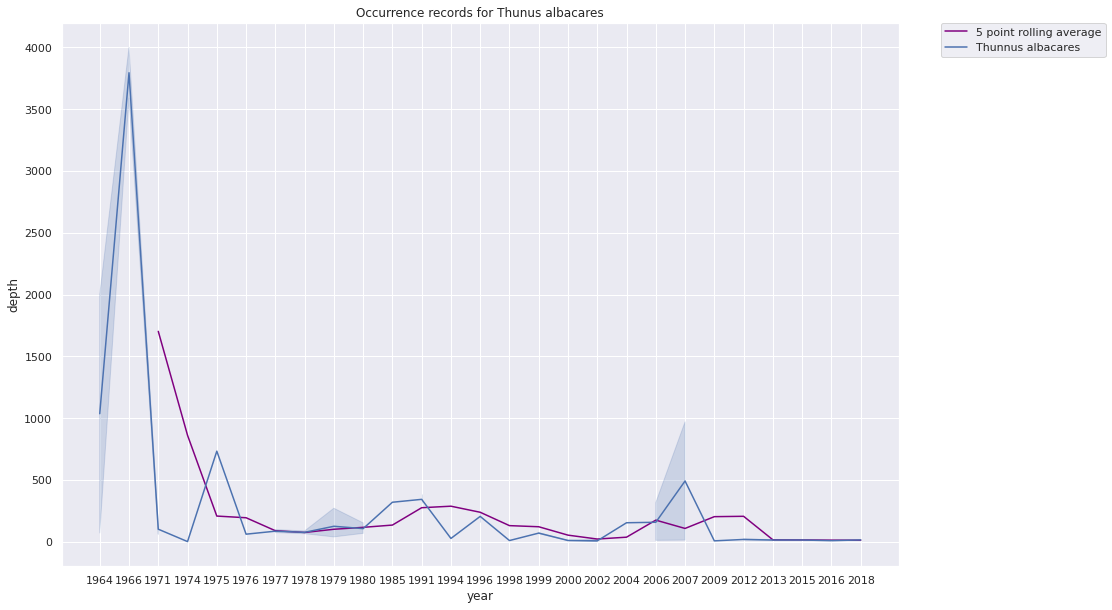

In [ ]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,10)})
dataDeriv = dataDeriv.sort_values(by="year")
q = sns.lineplot(x=dataDeriv[dataDeriv["scientificName"]=="Thunnus albacares"].year, y=dataDeriv[dataDeriv["scientificName"]=="Thunnus albacares"].depth.rolling(5).mean(), label="5 point rolling average", data=dataDeriv,ci=None, color="purple")
p = sns.lineplot(data = dataDeriv[dataDeriv["scientificName"]=="Thunnus albacares"], x = "year", y = "depth", hue="scientificName")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set_title("Occurrence records for Thunus albacares");

We can see that the average occurrence records have fallen down significantly post 1900 for *Thunus albacares*. **This is really serious**, we must work towards conservation of this Yellowfin tuna which is also categorised as "Near threatened".

Let us now visualize records for *Thunus obesus*.

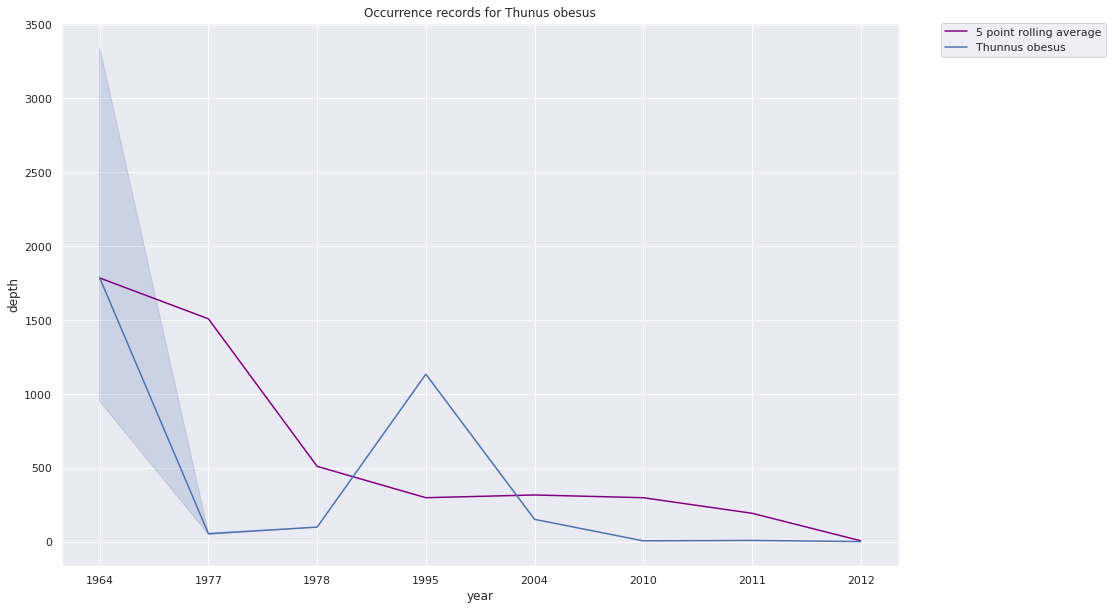

In [ ]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,10)})
q = sns.lineplot(x=dataDeriv[dataDeriv["scientificName"]=="Thunnus obesus"].year, y=dataDeriv[dataDeriv["scientificName"]=="Thunnus obesus"].depth.rolling(5).mean(), label="5 point rolling average", data=dataDeriv,ci=None, color="purple")
p = sns.lineplot(data = dataDeriv[dataDeriv["scientificName"]=="Thunnus obesus"], x = "year", y = "depth", hue="scientificName")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set_title("Occurrence records for Thunus obesus");

For **Thunus obesus** we can find that the average depth has decreased over the years, this means they are moving towards the surface.

Let us visualize for 

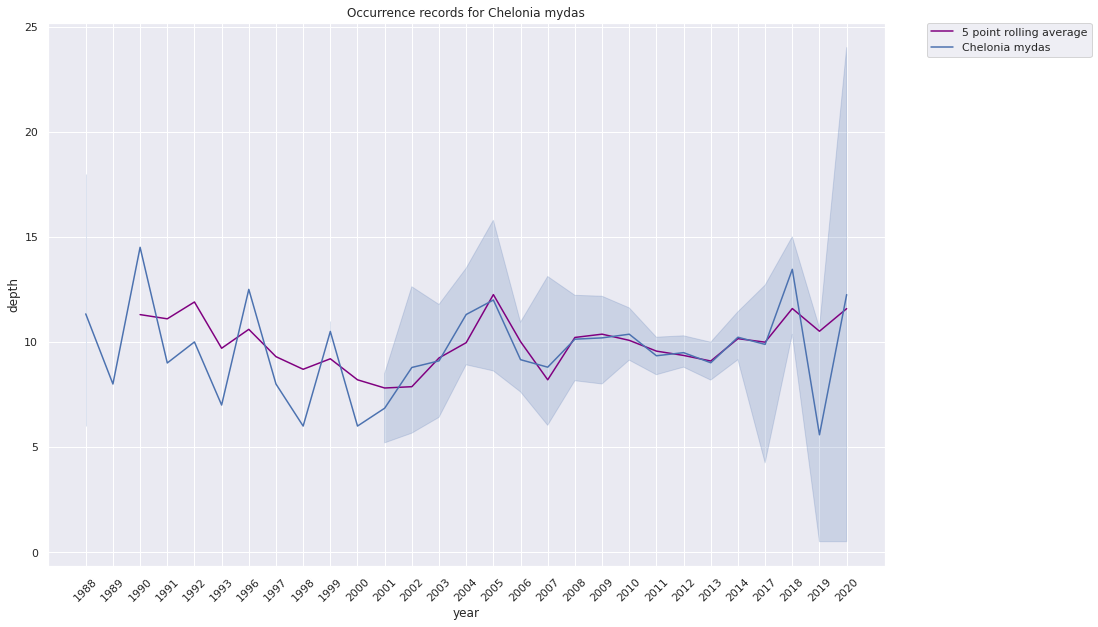

In [ ]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,10)})
q = sns.lineplot(x=dataDeriv[dataDeriv["scientificName"]=="Chelonia mydas"].year, y=dataDeriv[dataDeriv["scientificName"]=="Chelonia mydas"].depth.rolling(5).mean(), label="5 point rolling average", data=dataDeriv,ci=None, color="purple")
p = sns.lineplot(data = dataDeriv[dataDeriv["scientificName"]=="Chelonia mydas"], x = "year", y = "depth", hue="scientificName")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
p.set_title("Occurrence records for Chelonia mydas");

This one looks something substantial, we have got significant time-series data for *Chelonia mydas*. Two major observation we can make out from this graphs are:
+ We can clearly that the species is expanding over time, both minimal and maximal depth has increased significantly over time, but the maximal depth has increased a lot more than the minimal.
+ We can see that average depth has also increased slightly over time.
+ The above two observation may point out that the species is travelling south maybe in search of cooler waters. **Global Warming is now much more than ever before.**

Now let us pick one more species which has an interesting data story behind it. For this we will drop the species which have depths more than 1500m because the spikes in the graph will distract our attention.

In [ ]:
species_1500 = dataDeriv.groupby("scientificName").depth.max() # this will return a series object with indexes scientificName and max depth as its value
species_list = species_1500[species_1500<1500].index.values # print scientificNames which have max depth less than 1500
species_list

array(['Caretta', 'Caretta caretta', 'Chelonia', 'Chelonia mydas',
       'Cheloniidae', 'Dermochelys coriacea', 'Eretmochelys',
       'Eretmochelys imbricata', 'Eretmochelys imbricata bissa',
       'Katsuwonus pelamis', 'Lepidochelys kempii',
       'Lepidochelys olivacea', 'Lepomis gibbosus', 'Orcinus orca',
       'Rhincodon typus', 'Thunnus', 'Thunnus atlanticus',
       'Thunnus maccoyii', 'Thunnus orientalis', 'Thunnus thynnus',
       'Thunnus tonggol', 'Tursiops aduncus', 'Tursiops truncatus',
       'Tursiops truncatus ponticus'], dtype=object)

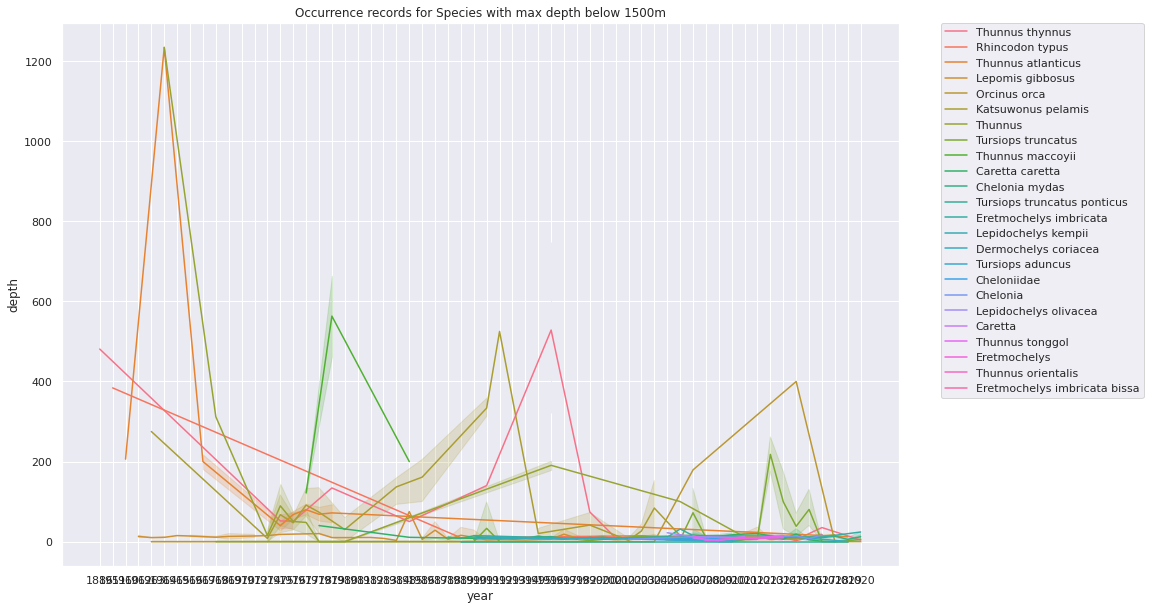

In [ ]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,10)})
dataDeriv = dataDeriv.sort_values(by="year")
p = sns.lineplot(data = dataDeriv[dataDeriv["scientificName"].isin(species_list)], x = "year", y = "depth", hue="scientificName")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set_title("Occurrence records for Species with max depth below 1500m");

From this graph, *Lepidechelys kempii* looks promising. Let us visualize its data.

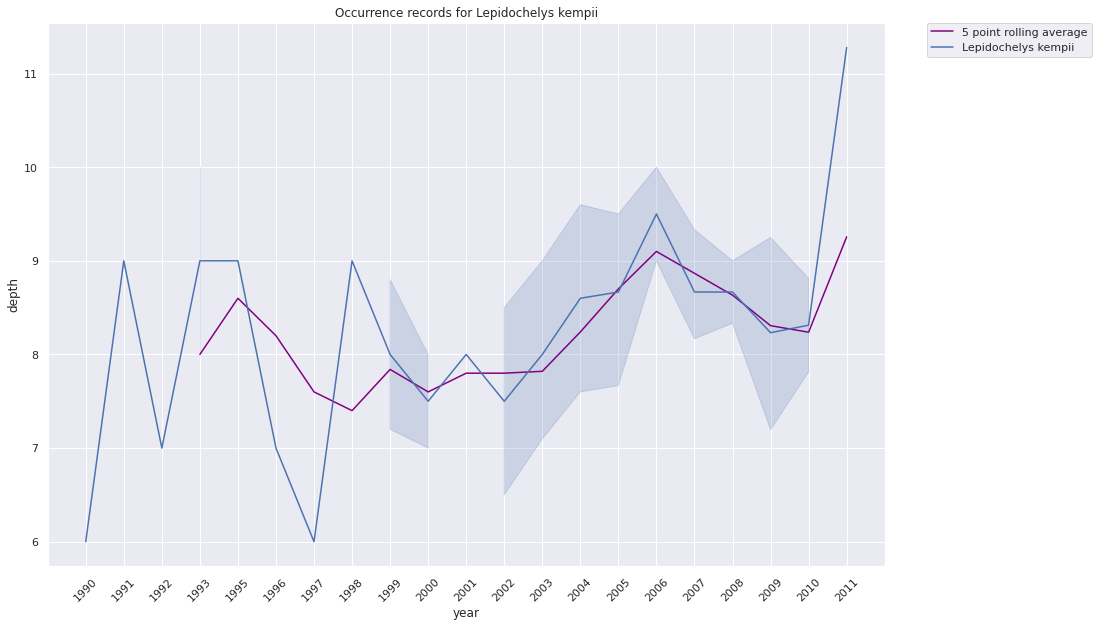

In [ ]:
sns.set_style("darkgrid")
q = sns.lineplot(x=dataDeriv[dataDeriv["scientificName"]=="Lepidochelys kempii"].year, y=dataDeriv[dataDeriv["scientificName"]=="Lepidochelys kempii"].depth.rolling(5).mean(), label="5 point rolling average", data=dataDeriv,ci=None, color="purple")
p = sns.lineplot(data = dataDeriv[dataDeriv["scientificName"]=="Lepidochelys kempii"], x = "year", y = "depth", hue="scientificName")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
p.set_title("Occurrence records for Lepidochelys kempii");

We can clearly note following observations for *Lepidochelys kempii*:
+ The average depth has increased over the years, this means the species is looking for cooler waters to escape the heating waters.
+ The species has witnessed a slight compression, i.e. minimal and maximal depth have come closer. For a brief period it compressed significantly (around 2006) this might be due to data constraints or maybe some seasonal current. After that it has regained a lot but still the average difference in minimal and maximal depth is lower than early 2000s.

## Analysing depth trend for a number of species under the same `order`
The above data don't excite us so much to gather a complete picture of what is hapenning with organisms due to climate changes because the data is really scarce and has a lot of variance. 

Let us now diverge and analyze depths of all species under the same order because they might share some common trend in movement over time. For this we will pick up *Tetraodontiformes* order first - the order *Mola mola* and other *Molidae* are a part of. You can get [more information here on WoRMS](https://www.marinespecies.org/aphia.php?p=taxdetails&id=10332)

In [44]:
res = occ.search(taxonid=10332, startdepth=-1.0, startdate='1700-00-00') # let's set a start date to obtain non-nan records
tet_df = pd.DataFrame(res["results"])
tet_df


Fetched 207808 records.


,infraphylum,country,date_year,habitat,references,institutionID,scientificNameID,year,scientificName,individualCount,...,organismScope,identifiedByID,recordedByID,subspecies,subspeciesid,infraspecificEpithet,behavior,taxonConceptID,rights,identificationReferences
0,Gnathostomata,United States,2012,Forereef : AGR : Aggregate Reef,https://accession.nodc.noaa.gov/0162472. https...,ESD,urn:lsid:marinespecies.org:taxname:219879,2012,Melichthys vidua,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,United States,1988,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:309334,NaN,Stephanolepis hispida,76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gnathostomata,Marshall Islands,1946,NaN,http://portal.vertnet.org/o/uwfc/adult-collect...,urn:lsid:biocol.org:col:34878,NaN,1946,Arothron nigropunctatus,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,Colombia,2017,NaN,NaN,ColombiaNIT:800250062-0,urn:lsid:marinespecies.org:taxname:127403,NaN,Diodon hystrix,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gnathostomata,United States,1981,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:127409,1981,Stephanolepis hispida,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207803,Gnathostomata,United States of America,2005,Shallow coral reef : Forereef,Coral Reef Ecosystem Program; Pacific Islands ...,https://ror.org/02apffz65,urn:lsid:marinespecies.org:taxname:219879,2005,Melichthys vidua,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207804,Gnathostomata,United States,2009,Backreef : UNK : Unknown,https://accession.nodc.noaa.gov/0162472. https...,ESD,urn:lsid:marinespecies.org:taxname:220063,2009,Oxymonacanthus longirostris,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207805,Gnathostomata,United States,2010,Spur and Groove low Relief,doi:10.1016/j.fishres.2011.01.012,NaN,urn:lsid:marinespecies.org:taxname:158932,NaN,Lactophrys triqueter,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207806,Gnathostomata,United States,2013,Forereef : PAV : Pavement,https://accession.nodc.noaa.gov/0162472. https...,ESD,urn:lsid:marinespecies.org:taxname:219874,2013,Balistapus undulatus,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Whoa! we can see that for the whole order we have got 207,808 rows of data with depth records.

Let us first study the distribution of depth records over time before we jump into analysing the depth change.

In [49]:
tet_df["nYear"] = tet_df.eventDate.str[:4].astype(int)

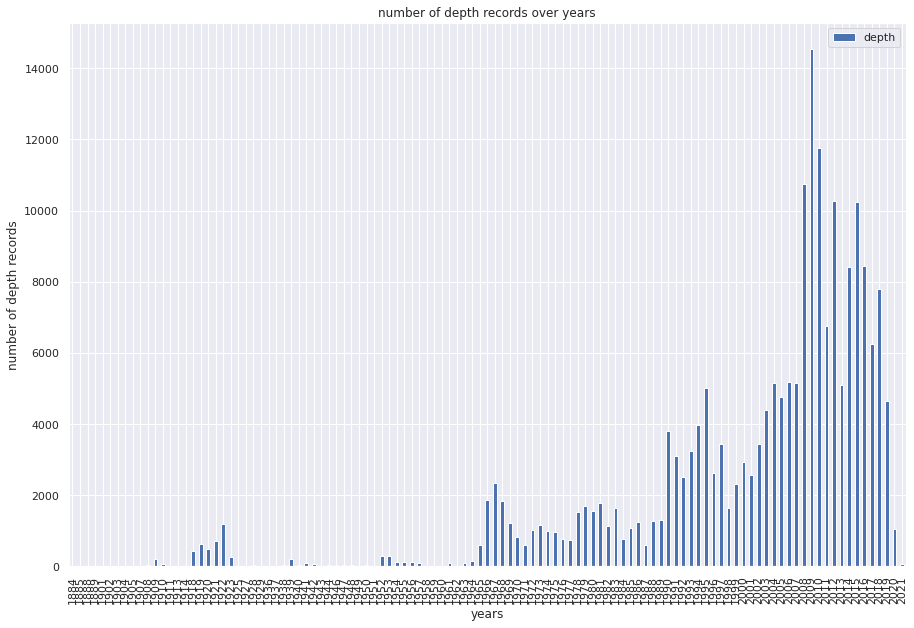

In [51]:
tet_df[["nYear","depth"]].groupby("nYear").count().plot.bar()
plt.xlabel("years")
plt.ylabel("number of depth records")
plt.title("number of depth records over years");

We can see that there is a huge variation in amount of data over years. There's a spike in the number around 2009, but since it has declined significantly. This high amount of variance might hurt us in our analysis.

But let us anyways do an analysis with the average depth of the order v/s time.

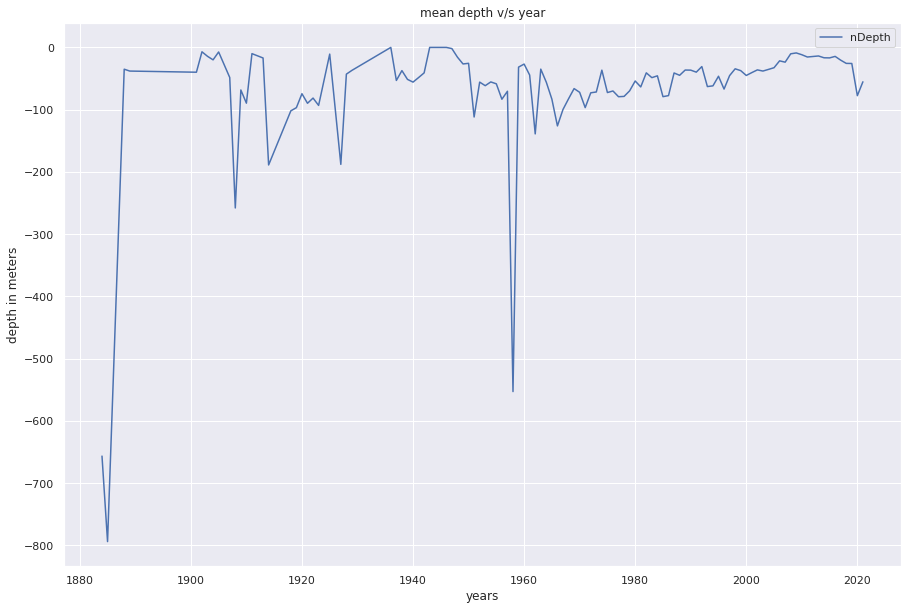

In [61]:
tet_df["nDepth"] = -tet_df["depth"]
tet_df[["nYear","nDepth"]].groupby("nYear").mean().plot()
plt.xlabel("years")
plt.ylabel("depth in meters")
plt.title("mean depth v/s year");

We can conclude three observations here:
+ There's a lot of variations in the data.
+ The period between 1910 to 1960 has a lot of variance therefore we can not land upon a firm understanding.
+ looking at the graph 1960 onwards, we can see that the average depth for this *order* has slightly reduced and species are moving towards the surface.

The high amount of variance makes it difficult for us to get over a strong conclusion.

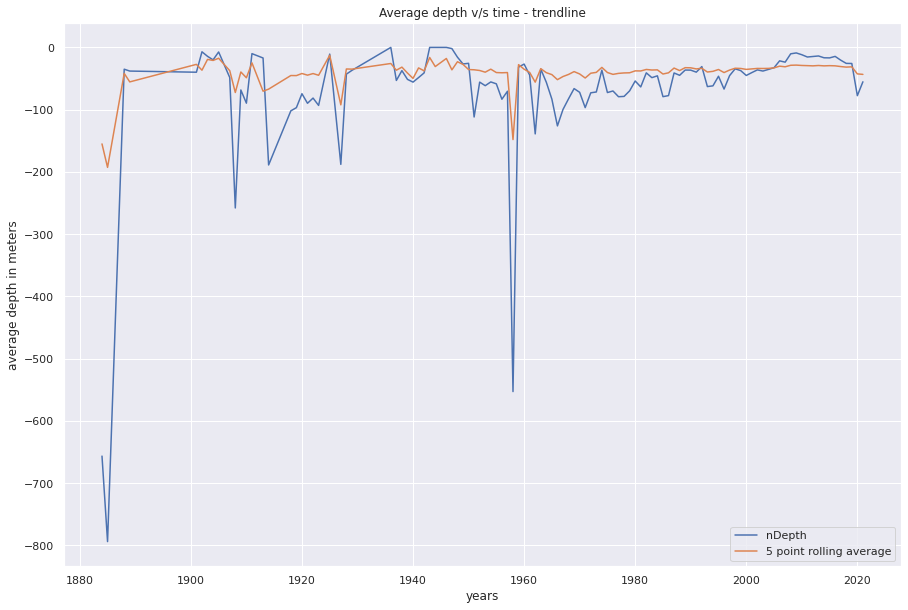

In [76]:
tet_df["nDepth"] = -tet_df["depth"]
tet_df[['nYear','nDepth']].groupby('nYear').mean().plot(label="average depth")
sns.lineplot(x=tet_df.nYear,y=tet_df[["nYear","nDepth"]].nDepth.rolling(5).mean(), ci=None, label="5 point rolling average")
plt.xlabel("years")
plt.ylabel("average depth in meters")
plt.title("Average depth v/s time - trendline");

From this plot we can barely make out that after 1960 the average depth has reduced slightly. We can figure this change when we zoom in the orange line which shows the 5 year rolling average.